<a href="https://colab.research.google.com/github/Ankur-Codes/Github_Project_Analysis/blob/main/Projects_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🔍 Core Data Analysis Questions

- **Popularity**: What are the most starred/forked projects?
- **Overuse**: What topics appear too frequently (e.g., “todo-app”)?
- **Diversity**: What languages or stacks dominate the popular repos?
- **Originality**: Are there similar clones with same topics/names?
- **Discovery**: Can we find underrated or niche repos?
- **Recommendation**: Can we suggest unique alternatives to popular projects?


In [ ]:
# Reset Colab environment (clears all variables and memory)
%reset -f


In [ ]:
!pip install python-dotenv


In [ ]:
from google.colab import userdata

API_KEY = userdata.get("GITHUB_TOKEN")

if not API_KEY:
    raise ValueError("GitHub token is missing. Please store it as a secret with key 'GITHUB_TOKEN'.")

HEADERS = {
    "Authorization": f"token {API_KEY}",
    "Accept": "application/vnd.github.mercy-preview+json"  # for topics
}


In [ ]:
import requests

response = requests.get("https://api.github.com/user", headers=HEADERS)
if response.status_code == 200:
    print("✅ Token valid! Authenticated as:", response.json().get("login"))
else:
    print("❌ Invalid token or rate limit issue. Status:", response.status_code)


✅ Token valid! Authenticated as: Ankur-Codes


In [ ]:
import requests
import pandas as pd




* Explore across a variety of tech stacks, not just Python.

* Understand which languages/frameworks/libraries are most used.

* Let users discover underrated technologies they might not think of.






In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm.notebook import tqdm
from google.colab import drive, userdata
import pandas as pd
import requests
import os
import time
import base64

# Mount Drive
drive.mount('/content/drive', force_remount=True)

#storage path
DATA_STORAGE = "/content/drive/MyDrive/github_12000_dataset_with_readme.csv"

# Get GitHub token
API_KEY = userdata.get("GITHUB_TOKEN")
if not API_KEY:
    raise ValueError("GitHub token missing. Add it in Colab secrets with key 'GITHUB_TOKEN'.")

HEADERS = {
    "Authorization": f"token {API_KEY}",
    "Accept": "application/vnd.github.mercy-preview+json"
}

TOPICS = [
    "django", "flask", "react", "vue", "angular", "nodejs", "express",
    "spring", "dotnet", "tensorflow", "pytorch", "machine-learning",
    "deep-learning", "nlp", "computer-vision", "android", "ios", "flutter",
    "kotlin", "swift", "go", "rust", "blockchain", "ethereum", "devops",
    "cloud", "kubernetes", "cybersecurity", "data-science", "big-data",
    "artificial-intelligence"
]
##using RAte Limiting pipelines
def wait_for_rate_limit(headers):
    remaining = int(headers.get('X-RateLimit-Remaining', 1))
    if remaining <= 1:
        reset_time = int(headers.get('X-RateLimit-Reset', 0))
        wait_seconds = max(reset_time - time.time(), 0) + 2
        print(f"Rate limit reached. Waiting {wait_seconds:.1f} seconds...")
        time.sleep(wait_seconds)


# fetching readme data
def fetch_readme(full_name):
    url = f"https://api.github.com/repos/{full_name}/readme"
    response = requests.get(url, headers=HEADERS)
    wait_for_rate_limit(response.headers)
    if response.status_code == 200:
        content = base64.b64decode(response.json()['content']).decode('utf-8', errors='ignore')
        return content
    return ""

# Dataset entries and others
def get_repos_for_topic(topic):
    results = []
    for page in range(1, 3):
        url = f"https://api.github.com/search/repositories?q=topic:{topic}+stars:>1000&sort=stars&order=desc&per_page=50&page={page}"
        response = requests.get(url, headers=HEADERS)
        wait_for_rate_limit(response.headers)
        if response.status_code != 200:
            print(f"Failed to fetch {topic} page {page}: {response.status_code}")
            break
        repos = response.json().get("items", [])
        for repo in repos:
            readme = fetch_readme(repo["full_name"])
            results.append({
                "Topic": topic,
                "Name": repo["full_name"],
                "Description": repo["description"],
                "Stars": repo["stargazers_count"],
                "Forks": repo["forks_count"],
                "Language": repo["language"],
                "Created At": repo["created_at"],
                "Updated At": repo["updated_at"],
                "URL": repo["html_url"],
                "Topics": ", ".join(repo.get("topics", [])),
                "README": readme
            })
        time.sleep(2)
    return results

# Check if file exists before fetching
if os.path.exists(DATA_STORAGE):
    print("Dataset already exists. Skipping fetch.")
    df = pd.read_csv(DATA_STORAGE)
else:
    all_data = []
    for topic in tqdm(TOPICS, desc="Topics"):
        data = get_repos_for_topic(topic)
        all_data.extend(data)
    if all_data:
        df = pd.DataFrame(all_data)
        df.to_csv(DATA_STORAGE, index=False, encoding="utf-8")
        print(f"Saved {len(all_data)} repositories to {DATA_STORAGE}")
    else:
        print("No data collected. Please check your token and rate limits.")

# Preview stats
if 'df' in locals():
    print("\nTop Topics:\n", df["Topic"].value_counts().head(10))
    print("\nTop Languages:\n", df["Language"].value_counts().head(10))


Mounted at /content/drive
Dataset already exists. Skipping fetch.

Top Topics:
 Topic
django              100
flask               100
react               100
vue                 100
angular             100
nodejs              100
spring              100
machine-learning    100
dotnet              100
tensorflow          100
Name: count, dtype: int64

Top Languages:
 Language
Python              675
TypeScript          351
Go                  284
JavaScript          263
Java                220
Jupyter Notebook    145
Rust                141
C++                 114
C#                   98
Dart                 94
Name: count, dtype: int64


In [3]:
DATA_STORAGE = "/content/drive/MyDrive/github_12000_dataset_with_readme.csv"


In [4]:


import pandas as pd
df = pd.read_csv(DATA_STORAGE)

# Display the first 5 rows
print(df.head())


# least and most used topics

print("\nLeast Used Topics:\n", df["Topic"].value_counts().sort_values(ascending=True).head(10))
print("\Most Used Topics:\n", df["Topic"].value_counts().sort_values(ascending=False).head(10))




    Topic                          Name  \
0  django                 django/django   
1  django   LeCoupa/awesome-cheatsheets   
2  django              getsentry/sentry   
3  django               makeplane/plane   
4  django  encode/django-rest-framework   

                                         Description  Stars  Forks  \
0  The Web framework for perfectionists with dead...  83894  32648   
1  👩‍💻👨‍💻 Awesome cheatsheets for popular program...  42740   6479   
2  Developer-first error tracking and performance...  41098   4363   
3  🔥 🔥 🔥 Open Source JIRA, Linear, Monday, and As...  36542   2345   
4                             Web APIs for Django. 🎸  29205   6958   

     Language            Created At            Updated At  \
0      Python  2012-04-28T02:47:18Z  2025-06-13T14:30:00Z   
1  JavaScript  2017-11-09T02:47:15Z  2025-06-13T11:36:11Z   
2      Python  2010-08-30T22:06:41Z  2025-06-13T15:49:42Z   
3  TypeScript  2022-11-19T12:55:01Z  2025-06-13T15:44:28Z   
4      Python  

In [5]:

print('\nColumn info:')
df.info()


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079 entries, 0 to 3078
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Topic        3079 non-null   object
 1   Name         3079 non-null   object
 2   Description  3078 non-null   object
 3   Stars        3079 non-null   int64 
 4   Forks        3079 non-null   int64 
 5   Language     2824 non-null   object
 6   Created At   3079 non-null   object
 7   Updated At   3079 non-null   object
 8   URL          3079 non-null   object
 9   Topics       3079 non-null   object
 10  README       3077 non-null   object
dtypes: int64(2), object(9)
memory usage: 264.7+ KB


In [6]:
df


,Topic,Name,Description,Stars,Forks,Language,Created At,Updated At,URL,Topics,README
0,django,django/django,The Web framework for perfectionists with dead...,83894,32648,Python,2012-04-28T02:47:18Z,2025-06-13T14:30:00Z,https://github.com/django/django,"apps, django, framework, models, orm, python, ...",======\nDjango\n======\n\nDjango is a high-lev...
1,django,LeCoupa/awesome-cheatsheets,👩‍💻👨‍💻 Awesome cheatsheets for popular program...,42740,6479,JavaScript,2017-11-09T02:47:15Z,2025-06-13T11:36:11Z,https://github.com/LeCoupa/awesome-cheatsheets,"backend, bash, cheatsheet, cheatsheets, databa...",[![AWESOME CHEATSHEETS LOGO](_design/cover_git...
2,django,getsentry/sentry,Developer-first error tracking and performance...,41098,4363,Python,2010-08-30T22:06:41Z,2025-06-13T15:49:42Z,https://github.com/getsentry/sentry,"apm, crash-reporting, crash-reports, csp-repor...","<p align=""center"">\n <p align=""center"">\n ..."
3,django,makeplane/plane,"🔥 🔥 🔥 Open Source JIRA, Linear, Monday, and As...",36542,2345,TypeScript,2022-11-19T12:55:01Z,2025-06-13T15:44:28Z,https://github.com/makeplane/plane,"django, docker, issue-tracker, jira, jira-alte...","<br /><br />\n\n<p align=""center"">\n<a href=""h..."
4,django,encode/django-rest-framework,Web APIs for Django. 🎸,29205,6958,Python,2011-03-02T17:13:56Z,2025-06-13T15:08:43Z,https://github.com/encode/django-rest-framework,"api, django, python, rest",# [Django REST framework][docs]\n\n[![build-st...
...,...,...,...,...,...,...,...,...,...,...,...
3074,artificial-intelligence,sindresorhus/awesome-chatgpt,🤖 Awesome list for ChatGPT — an artificial int...,5644,338,NaN,2023-05-02T10:07:14Z,2025-06-13T05:58:42Z,https://github.com/sindresorhus/awesome-chatgpt,"ai, artificial-intelligence, awesome, awesome-...","<div align=""center"">\n\t<br>\n\t<br>\n\t<div>\..."
3075,artificial-intelligence,lucidrains/DALLE-pytorch,"Implementation / replication of DALL-E, OpenAI...",5615,639,Python,2021-01-05T20:35:16Z,2025-06-13T03:12:10Z,https://github.com/lucidrains/DALLE-pytorch,"artificial-intelligence, attention-mechanism, ...",# DALL-E in Pytorch\n\n<p align='center'>\n <...
3076,artificial-intelligence,guofei9987/scikit-opt,"Genetic Algorithm, Particle Swarm Optimization...",5544,1003,Python,2017-12-05T10:20:41Z,2025-06-13T09:51:58Z,https://github.com/guofei9987/scikit-opt,"ant-colony-algorithm, artificial-intelligence,...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n# ...
3077,artificial-intelligence,The-Pocket/PocketFlow,Pocket Flow: 100-line LLM framework. Let Agent...,5439,609,Python,2024-12-24T02:43:30Z,2025-06-13T15:03:21Z,https://github.com/The-Pocket/PocketFlow,"agentic-ai, agentic-framework, agentic-workflo...","<div align=""center"">\n <img src=""https://gith..."


In [7]:
df.isnull().sum().sort_values(ascending=False)



,0
Language,255
README,2
Description,1
Name,0
Topic,0
Forks,0
Stars,0
Created At,0
Updated At,0
URL,0


In [8]:
df[df['Topic'] == 'spring'].head()
# df['Topic'].unique()

,Topic,Name,Description,Stars,Forks,Language,Created At,Updated At,URL,Topics,README
692,spring,Snailclimb/JavaGuide,「Java学习+面试指南」一份涵盖大部分 Java 程序员所需要掌握的核心知识。准备 Jav...,150216,45861,Java,2018-05-07T13:27:00Z,2025-06-13T15:17:09Z,https://github.com/Snailclimb/JavaGuide,"algorithms, interview, java, jvm, mysql, redis...",推荐你通过在线阅读网站进行阅读，体验更好，速度更快！地址：[javaguide.cn](ht...
693,spring,macrozheng/mall,mall项目是一套电商系统，包括前台商城系统及后台管理系统，基于Spring Boot+My...,80670,29325,Java,2018-04-04T01:11:44Z,2025-06-13T15:00:57Z,https://github.com/macrozheng/mall,"docker, elasticsearch, elk, java, mongodb, myb...","# mall\n\n<p>\n <a href=""#公众号""><img src=""http..."
694,spring,spring-projects/spring-boot,Spring Boot helps you to create Spring-powered...,77441,41233,Java,2012-10-19T15:02:57Z,2025-06-13T15:16:15Z,https://github.com/spring-projects/spring-boot,"framework, java, spring, spring-boot",= Spring Boot image:https://github.com/spring-...
695,spring,spring-projects/spring-framework,Spring Framework,58234,38523,Java,2010-12-08T04:04:45Z,2025-06-13T15:03:28Z,https://github.com/spring-projects/spring-fram...,"framework, spring, spring-framework","# <img src=""framework-docs/src/docs/spring-fra..."
696,spring,xkcoding/spring-boot-demo,🚀一个用来深入学习并实战 Spring Boot 的项目。,33719,10985,Java,2017-11-10T06:27:29Z,2025-06-13T09:02:08Z,https://github.com/xkcoding/spring-boot-demo,"demo, in-action, java, spring, spring-boot, sp...","<h1 align=""center""><a href=""https://github.com..."


In [9]:


# Fill missing descriptions with empty string
df['Description'] = df['Description'].fillna("")

# Convert all NaN (null) language values to the string 'Unknown'
df["Language"] = df["Language"].fillna("Unknown")

In [10]:
# Fill Unknown with known languages
def guess_language_from_readme(readme):

    if pd.isnull(readme):
        return "Unknown"

    readme = readme.lower()


    languages = [
        "django", "flask", "react", "vue", "angular", "nodejs", "express",
    "spring", "dotnet", "tensorflow", "pytorch", "machine-learning",
    "deep-learning", "nlp", "computer-vision", "android", "ios", "flutter",
    "kotlin", "swift", "go", "rust", "blockchain", "ethereum", "devops",
    "cloud", "kubernetes", "cybersecurity", "data-science", "big-data",
    "artificial-intelligence"
        ]

    for lang in languages:
        if lang in readme:
            return lang.capitalize()

    return "Unknown"


In [11]:
df['Language'] = df.apply(
    lambda row: guess_language_from_readme(row['README']) if pd.isnull(row['Language']) else row['Language'],
    axis=1
)


In [12]:
df

,Topic,Name,Description,Stars,Forks,Language,Created At,Updated At,URL,Topics,README
0,django,django/django,The Web framework for perfectionists with dead...,83894,32648,Python,2012-04-28T02:47:18Z,2025-06-13T14:30:00Z,https://github.com/django/django,"apps, django, framework, models, orm, python, ...",======\nDjango\n======\n\nDjango is a high-lev...
1,django,LeCoupa/awesome-cheatsheets,👩‍💻👨‍💻 Awesome cheatsheets for popular program...,42740,6479,JavaScript,2017-11-09T02:47:15Z,2025-06-13T11:36:11Z,https://github.com/LeCoupa/awesome-cheatsheets,"backend, bash, cheatsheet, cheatsheets, databa...",[![AWESOME CHEATSHEETS LOGO](_design/cover_git...
2,django,getsentry/sentry,Developer-first error tracking and performance...,41098,4363,Python,2010-08-30T22:06:41Z,2025-06-13T15:49:42Z,https://github.com/getsentry/sentry,"apm, crash-reporting, crash-reports, csp-repor...","<p align=""center"">\n <p align=""center"">\n ..."
3,django,makeplane/plane,"🔥 🔥 🔥 Open Source JIRA, Linear, Monday, and As...",36542,2345,TypeScript,2022-11-19T12:55:01Z,2025-06-13T15:44:28Z,https://github.com/makeplane/plane,"django, docker, issue-tracker, jira, jira-alte...","<br /><br />\n\n<p align=""center"">\n<a href=""h..."
4,django,encode/django-rest-framework,Web APIs for Django. 🎸,29205,6958,Python,2011-03-02T17:13:56Z,2025-06-13T15:08:43Z,https://github.com/encode/django-rest-framework,"api, django, python, rest",# [Django REST framework][docs]\n\n[![build-st...
...,...,...,...,...,...,...,...,...,...,...,...
3074,artificial-intelligence,sindresorhus/awesome-chatgpt,🤖 Awesome list for ChatGPT — an artificial int...,5644,338,Unknown,2023-05-02T10:07:14Z,2025-06-13T05:58:42Z,https://github.com/sindresorhus/awesome-chatgpt,"ai, artificial-intelligence, awesome, awesome-...","<div align=""center"">\n\t<br>\n\t<br>\n\t<div>\..."
3075,artificial-intelligence,lucidrains/DALLE-pytorch,"Implementation / replication of DALL-E, OpenAI...",5615,639,Python,2021-01-05T20:35:16Z,2025-06-13T03:12:10Z,https://github.com/lucidrains/DALLE-pytorch,"artificial-intelligence, attention-mechanism, ...",# DALL-E in Pytorch\n\n<p align='center'>\n <...
3076,artificial-intelligence,guofei9987/scikit-opt,"Genetic Algorithm, Particle Swarm Optimization...",5544,1003,Python,2017-12-05T10:20:41Z,2025-06-13T09:51:58Z,https://github.com/guofei9987/scikit-opt,"ant-colony-algorithm, artificial-intelligence,...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n# ...
3077,artificial-intelligence,The-Pocket/PocketFlow,Pocket Flow: 100-line LLM framework. Let Agent...,5439,609,Python,2024-12-24T02:43:30Z,2025-06-13T15:03:21Z,https://github.com/The-Pocket/PocketFlow,"agentic-ai, agentic-framework, agentic-workflo...","<div align=""center"">\n <img src=""https://gith..."


In [13]:
df = df.drop_duplicates()

In [14]:
df = df.dropna(subset = ['README'])

In [15]:
df["Description"] = df["Description"].fillna("No description provided")


In [16]:
import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'<.*?>', '', text)               # Remove HTML tags
    text = re.sub(r'[^\x00-\x7F]+', '', text)       # Remove emojis and non-ASCII chars
    text = re.sub(r'[^\w\s.,!?-]', '', text)        # Remove special chars except basic punctuation
    return text.strip().lower()                     # Lowercase

# Apply cleaning
df["README_Clean"] = df["README"].apply(clean_text)
df["Description_Clean"] = df["Description"].apply(clean_text)


In [17]:
df["Created At"] = pd.to_datetime(df["Created At"])
df["Updated At"] = pd.to_datetime(df["Updated At"])


In [18]:
df = df.drop_duplicates(subset=["Name"])

In [19]:
df["Readme_Length"] = df["README_Clean"].apply(len)


/tmp/ipython-input-19-3682262918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Readme_Length"] = df["README_Clean"].apply(len)


In [20]:
def count_topics(x):
    if pd.isnull(x):
        return 0
    return len(str(x).split(','))

df["Num_Topics"] = df["Topics"].apply(count_topics)


# Alternative lambda function
# df["Num_Topics"] = df["Topics"].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)


/tmp/ipython-input-20-574402269.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_Topics"] = df["Topics"].apply(count_topics)


In [21]:
df[df['Topic']!='django'].head(50)

,Topic,Name,Description,Stars,Forks,Language,Created At,Updated At,URL,Topics,README,README_Clean,Description_Clean,Readme_Length,Num_Topics
100,flask,pallets/flask,The Python micro framework for building web ap...,69740,16474,Python,2010-04-06 11:11:59+00:00,2025-06-13 15:06:04+00:00,https://github.com/pallets/flask,"flask, jinja, pallets, python, web-framework, ...","<div align=""center""><img src=""https://raw.gith...",flask flask is a lightweight wsgi web applicat...,the python micro framework for building web ap...,1371,7
101,flask,apache/superset,Apache Superset is a Data Visualization and Da...,66637,15148,Jupyter Notebook,2015-07-21 18:55:34+00:00,2025-06-13 09:39:54+00:00,https://github.com/apache/superset,"analytics, apache, apache-superset, asf, bi, b...",<!--\nLicensed to the Apache Software Foundati...,superset !licensehttpsimg.shields.iobadgelicen...,apache superset is a data visualization and da...,7472,18
102,flask,Asabeneh/30-Days-Of-Python,30 days of Python programming challenge is a s...,46826,8940,Python,2019-11-19 17:24:16+00:00,2025-06-13 15:50:18+00:00,https://github.com/Asabeneh/30-Days-Of-Python,"30-days-of-python, flask, github, heroku, matp...",# 🐍 30 Days Of Python\n\n <strong>Learn with ...,30 days of python learn with asabeneh by joini...,30 days of python programming challenge is a s...,18870,10
103,flask,plotly/dash,Data Apps & Dashboards for Python. No JavaScri...,22953,2161,Python,2015-04-10 01:53:08+00:00,2025-06-13 14:19:52+00:00,https://github.com/plotly/dash,"bioinformatics, charting, dash, data-science, ...",# Dash\n\n[![CircleCI](https://img.shields.io/...,dash !circlecihttpsimg.shields.iocircleciproje...,data apps dashboards for python. no javascrip...,5754,18
104,flask,humiaozuzu/awesome-flask,A curated list of awesome Flask resources and ...,12503,1595,Unknown,2014-03-08 07:54:36+00:00,2025-06-13 07:55:06+00:00,https://github.com/humiaozuzu/awesome-flask,"awesome, flask, flask-resources",# Awesome Flask [![Awesome](https://cdn.rawgit...,awesome flask !awesomehttpscdn.rawgit.comsindr...,a curated list of awesome flask resources and ...,14737,3
106,flask,benbusby/whoogle-search,"A self-hosted, ad-free, privacy-respecting met...",10749,1007,Python,2020-01-21 20:22:33+00:00,2025-06-13 11:31:53+00:00,https://github.com/benbusby/whoogle-search,"adblock, docker, easy-deploy, flask, heroku, m...",">[!WARNING]\n>\n>As of 16 January, 2025, Googl...","!warning as of 16 january, 2025, google seemi...","a self-hosted, ad-free, privacy-respecting met...",34091,11
107,flask,vvbbnn00/WARP-Clash-API,该项目可以让你通过订阅的方式使用Cloudflare WARP+，自动获取流量。This p...,8677,1157,Python,2023-08-23 19:19:40+00:00,2025-06-13 14:39:19+00:00,https://github.com/vvbbnn00/WARP-Clash-API,"clash, cloudflare, docker, docker-compose, fla...",# WARP Clash API\n\n![GitHub License](https://...,warp clash api !github licensehttpsimg.shields...,cloudflare warpthis project enables you to use...,2658,8
108,flask,miguelgrinberg/flasky,"Companion code to my O'Reilly book ""Flask Web ...",8648,4222,Python,2013-12-24 05:38:12+00:00,2025-06-13 10:58:15+00:00,https://github.com/miguelgrinberg/flasky,"flask, python",Flasky\n======\n\nThis repository contains the...,flasky this repository contains the source co...,companion code to my oreilly book flask web de...,656,2
109,flask,jofpin/trape,People tracker on the Internet: OSINT analysis...,8311,1312,Python,2017-10-31 14:03:57+00:00,2025-06-13 06:11:14+00:00,https://github.com/jofpin/trape,"flask, footprint, hacking, hacking-tool, jose-...",trape (stable) v2.0\n========\n\nPeople tracke...,trape stable v2.0 people tracker on the inter...,people tracker on the internet osint analysis ...,7780,12
110,flask,dvf/blockchain,A simple Blockchain in Python,7960,2794,C#,2017-09-24 19:36:36+00:00,2025-06-11 14:39:48+00:00,https://github.com/dvf/blockchain,"bitcoin, blockchain, cryptocurrency, flask, py...",# Are you looking for the source code for my b...,are you looking for the source code for my boo...,a s

DATA CLEANING REMOVING DUPLICATES

In [22]:
df = df.drop_duplicates(subset='Name')

In [23]:
df[(df["Readme_Length"] < 100) ]

,Topic,Name,Description,Stars,Forks,Language,Created At,Updated At,URL,Topics,README,README_Clean,Description_Clean,Readme_Length,Num_Topics
542,nodejs,Binaryify/NeteaseCloudMusicApi,网易云音乐 Node.js API service,30316,15831,Unknown,2016-06-22 11:58:03+00:00,2025-06-13 10:00:48+00:00,https://github.com/Binaryify/NeteaseCloudMusicApi,"api, apis, cloudmusic, javascript, neteaseclou...","保护版权,此仓库不再维护\r\n\r\n相关新闻： \r\n\r\nhttps://www...",", httpswww.landiannews.comarchives101953.html...",node.js api service,77,6
1702,flutter,alibaba/flutter-go,flutter 开发者帮助 APP，包含 flutter 常用 140+ 组件的demo 演...,23706,3792,Dart,2019-01-08 09:03:40+00:00,2025-06-12 06:01:48+00:00,https://github.com/alibaba/flutter-go,"dart, flutter, flutter-demo, flutter-doc",# FlutterGo\n\n感谢大家一直以来对 FlutterGo 的支持与反馈。\n\n...,fluttergo fluttergo fluttergo fluttergo ...,flutter app flutter 140 demo,86,4
1786,flutter,boyan01/flutter-netease-music,flutter music player application. (仿网易云音乐),3488,854,Unknown,2018-11-24 09:01:37+00:00,2025-06-13 13:15:48+00:00,https://github.com/boyan01/flutter-netease-music,"android, android-application, dart, flutter, f...","保护版权,此仓库不再维护",",",flutter music player application.,1,7
2145,rust,zzzgydi/clash-verge,"A Clash GUI based on tauri. Supports Windows, ...",21911,3203,TypeScript,2021-12-04 06:31:50+00:00,2025-06-13 15:02:40+00:00,https://github.com/zzzgydi/clash-verge,"clash, cross-platform, react, rust, tauri",Removed\n,removed,"a clash gui based on tauri. supports windows, ...",7,5
2265,blockchain,hyperledger/hyperledger,Hyperledger is a Collaborative Project at The ...,3718,705,Unknown,2015-11-03 22:32:18+00:00,2025-06-12 14:27:34+00:00,https://github.com/hyperledger/hyperledger,"blockchain, distributed-ledger, hyperledger",[You can see a rendered version of this repo h...,you can see a rendered version of this repo he...,hyperledger is a collaborative project at the ...,85,3


In [24]:

df = df[(df["Readme_Length"] > 100) & (df["Stars"] > 0)]


**Overview of the Cleaned Dataset**

In [25]:
len(df)

2419

In [26]:
df["Language"].value_counts().head(10)


,count
Language,
Python,501
TypeScript,275
Go,230
JavaScript,214
Java,207
Unknown,176
Rust,124
C#,88
Jupyter Notebook,85


In [27]:
df["Stars"].describe()

,Stars
count,2419.000000
mean,16203.093840
std,21943.351312
min,1015.000000
25%,4852.000000
50%,9431.000000
75%,19951.000000
max,420646.000000


In [28]:
df.isnull().sum()

,0
Topic,0
Name,0
Description,0
Stars,0
Forks,0
Language,0
Created At,0
Updated At,0
URL,0
Topics,0


Removing Null

In [29]:
df["Description"] = df["Description"].fillna("No description provided.")

/tmp/ipython-input-29-3282097226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Description"] = df["Description"].fillna("No description provided.")


In [30]:
df["Language"] = df["Language"].fillna("Unknown")

/tmp/ipython-input-30-642680739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Language"] = df["Language"].fillna("Unknown")


In [31]:
df.isnull().sum()

,0
Topic,0
Name,0
Description,0
Stars,0
Forks,0
Language,0
Created At,0
Updated At,0
URL,0
Topics,0


# **EDA**

/tmp/ipython-input-32-3464058159.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette="viridis")


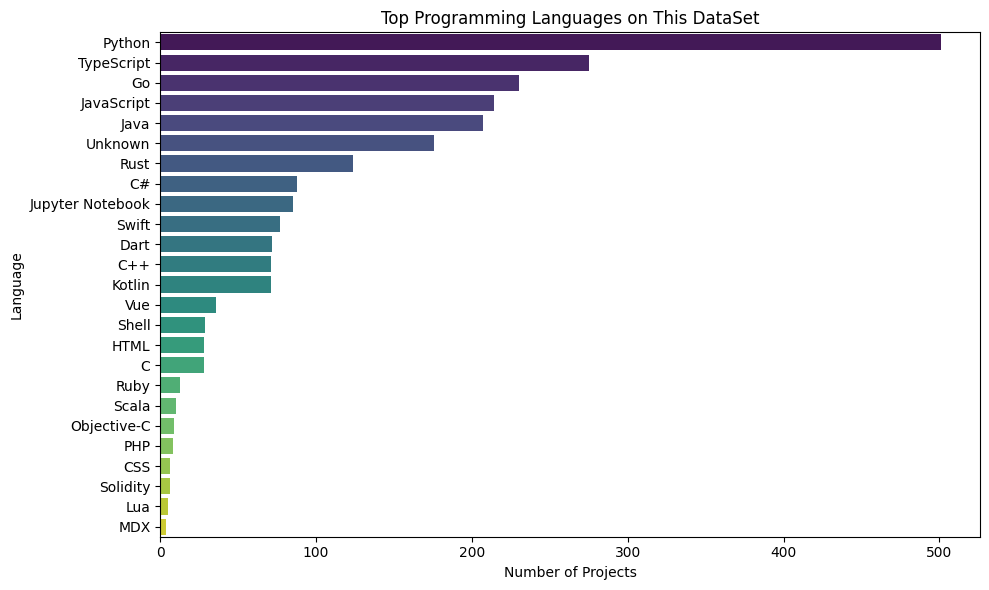

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count and sort language frequencies
language_counts = df['Language'].value_counts().head(25)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette="viridis")
plt.title("Top Programming Languages on This DataSet")
plt.xlabel("Number of Projects")
plt.ylabel("Language")
plt.tight_layout()
plt.show()


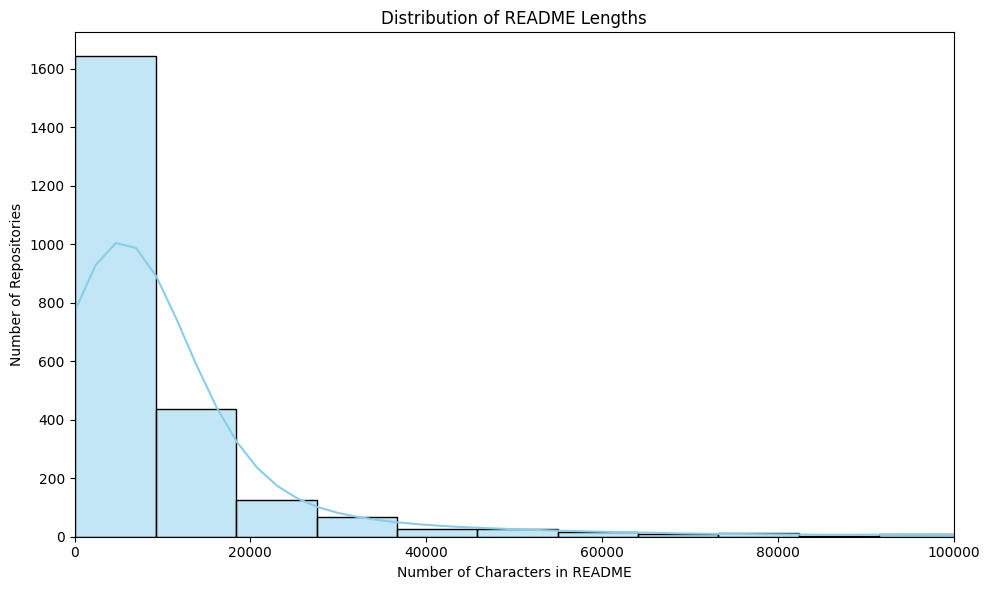

In [33]:

plt.figure(figsize=(10, 6))

sns.histplot(df['Readme_Length'], bins=50, kde=True, color='skyblue')

plt.title("Distribution of README Lengths")
plt.xlabel("Number of Characters in README")
plt.ylabel("Number of Repositories")
plt.xlim(0, 100000)
plt.tight_layout()
plt.show()


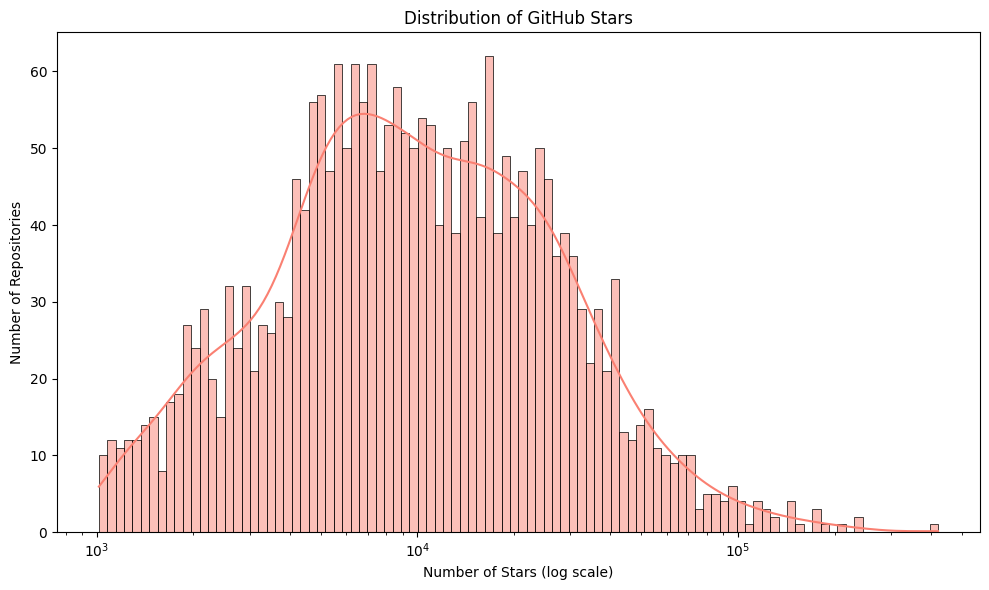

In [34]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Stars'], bins=100, kde=True, color='salmon', log_scale=(True, False))

plt.title("Distribution of GitHub Stars")
plt.xlabel("Number of Stars (log scale)")
plt.ylabel("Number of Repositories")
plt.tight_layout()
plt.show()


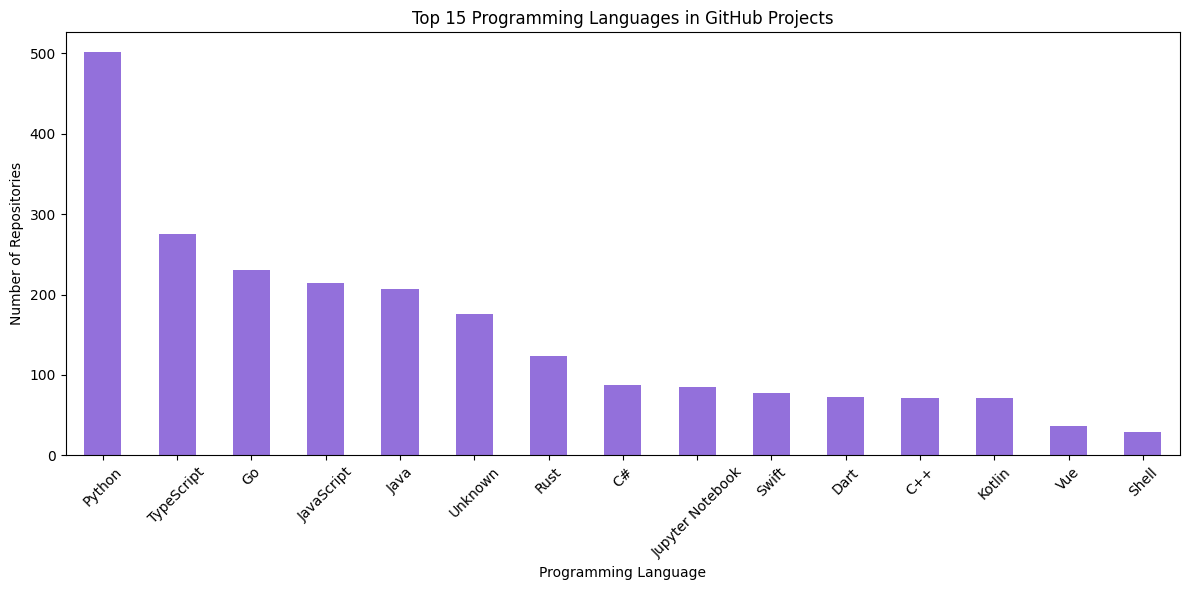

In [35]:
plt.figure(figsize=(12, 6))

df['Language'].value_counts().head(15).plot(kind='bar', color='mediumpurple')

plt.title("Top 15 Programming Languages in GitHub Projects")
plt.xlabel("Programming Language")
plt.ylabel("Number of Repositories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
from collections import Counter

all_topics = []

for topics in df["Topics"].dropna():
    all_topics.extend([topic.strip().lower() for topic in str(topics).split(',')])

topic_counts = Counter(all_topics)


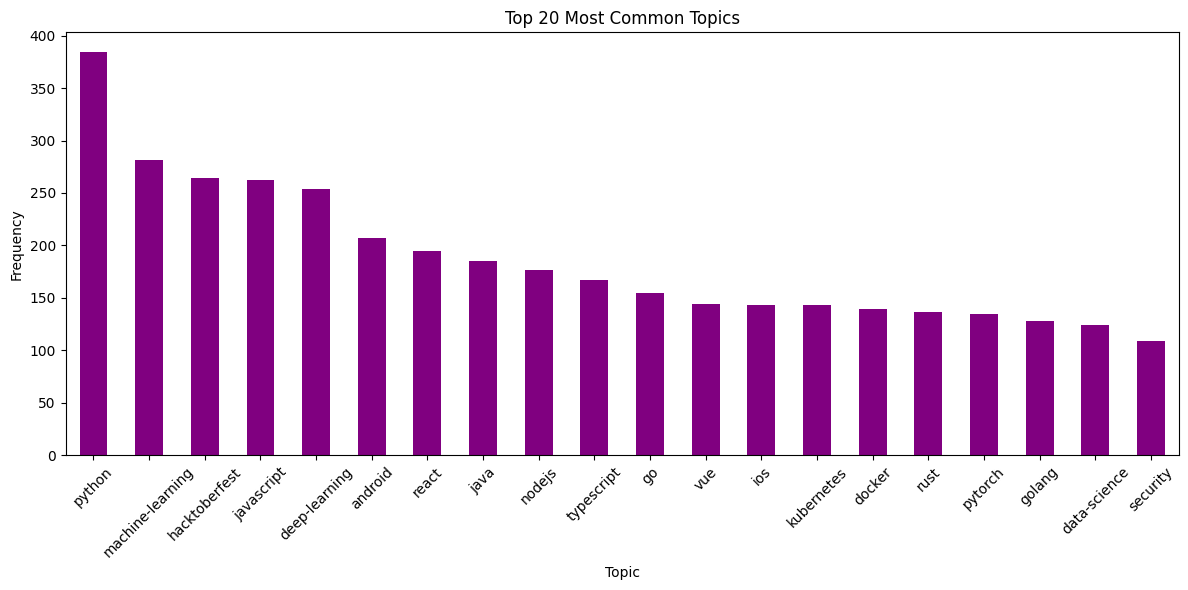

In [37]:
from collections import Counter
from wordcloud import WordCloud

# Combine all topic strings into one big list
all_topics = ','.join(df['Topics'].dropna()).split(',')

# Count how often each topic appears
topic_counts = Counter([t.strip().lower() for t in all_topics if t.strip()])

# Plot the most common topics
plt.figure(figsize=(12, 6))
pd.Series(topic_counts).sort_values(ascending=False).head(20).plot(kind='bar', color='purple')
plt.title("Top 20 Most Common Topics")
plt.ylabel("Frequency")
plt.xlabel("Topic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Top 20 Most Used Languages**

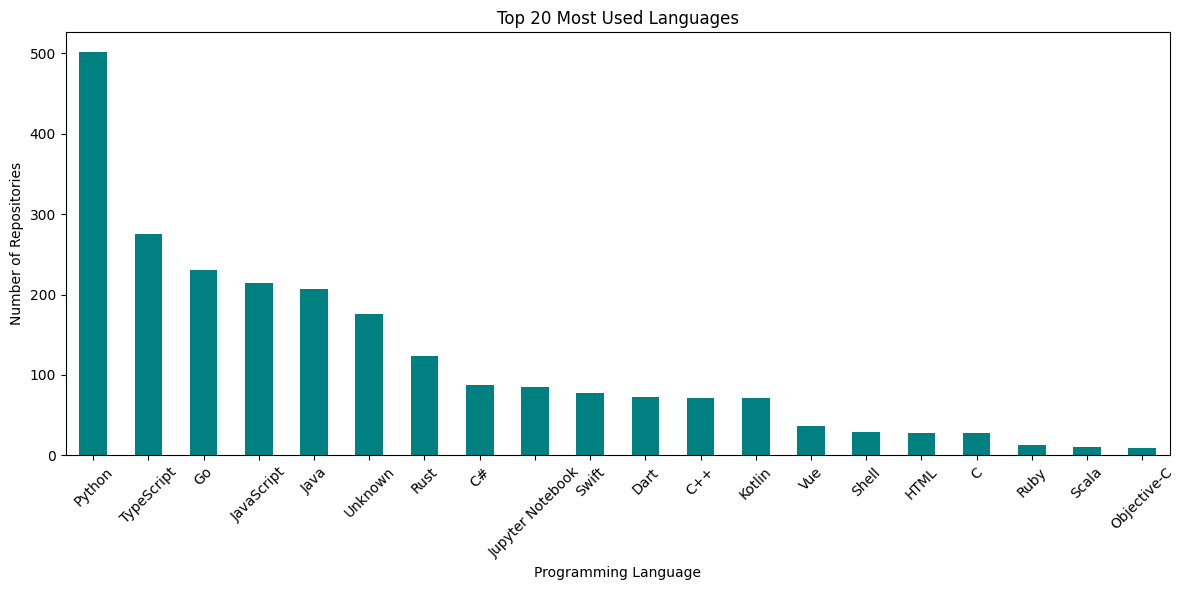

In [38]:
plt.figure(figsize=(12, 6))
df['Language'].value_counts().head(20).plot(kind='bar', color='teal')
plt.title("Top 20 Most Used Languages")
plt.ylabel("Number of Repositories")
plt.xlabel("Programming Language")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


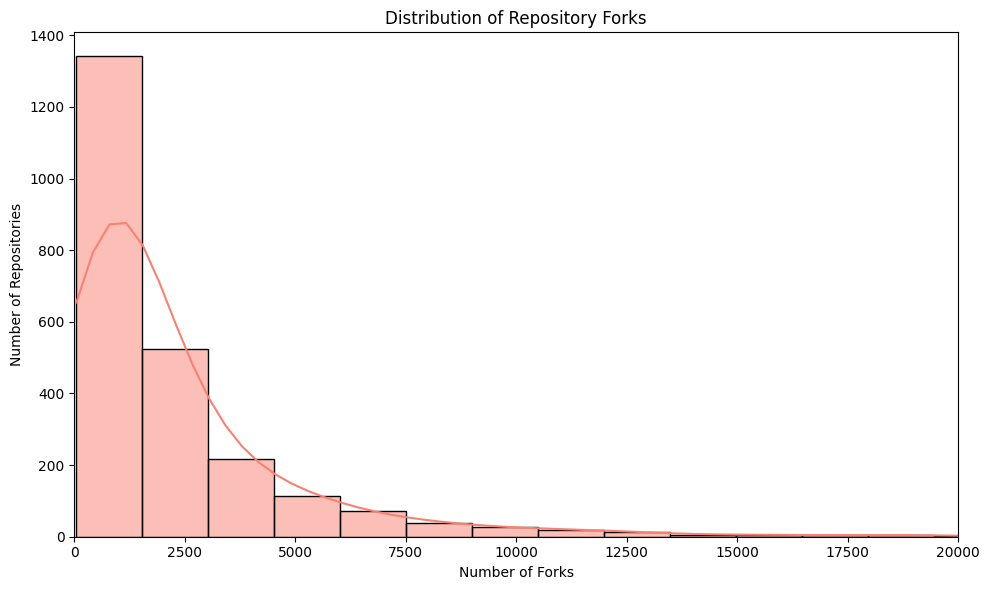

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Forks'], bins=50, kde=True, color='salmon')
plt.title("Distribution of Repository Forks")
plt.xlabel("Number of Forks")
plt.ylabel("Number of Repositories")
plt.xlim(0, 20000)
plt.tight_layout()
plt.show()


In [40]:
df["Created At"] = pd.to_datetime(df["Created At"])
df["Updated At"] = pd.to_datetime(df["Updated At"])


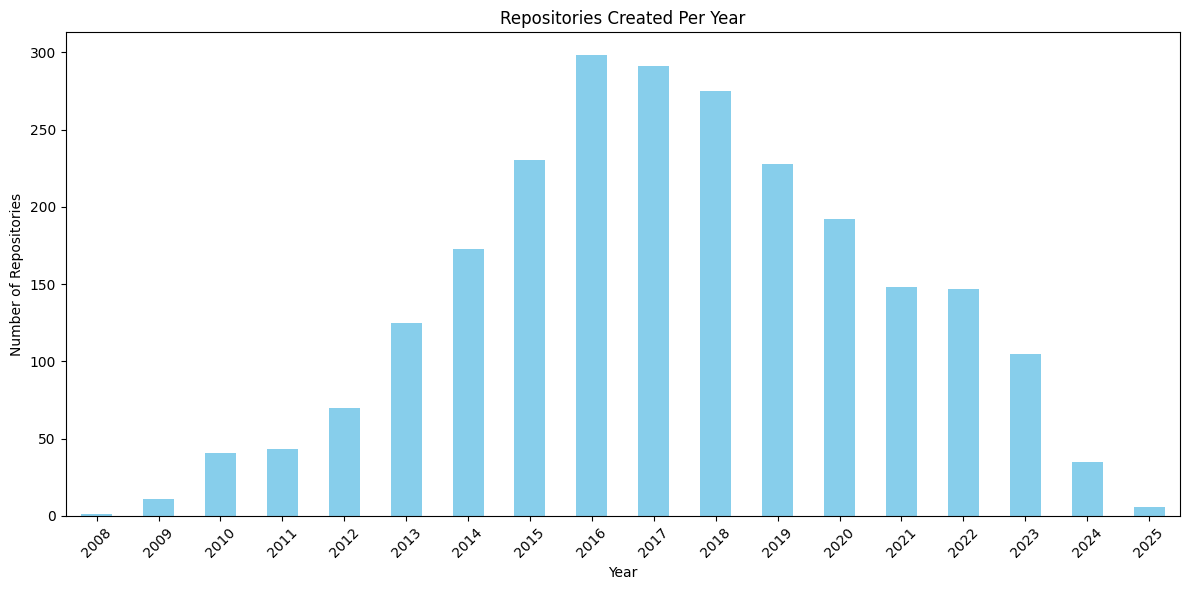

In [41]:
plt.figure(figsize=(12, 6))

df["Created At"].dt.year.value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title("Repositories Created Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Repositories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
df



,Topic,Name,Description,Stars,Forks,Language,Created At,Updated At,URL,Topics,README,README_Clean,Description_Clean,Readme_Length,Num_Topics
0,django,django/django,The Web framework for perfectionists with dead...,83894,32648,Python,2012-04-28 02:47:18+00:00,2025-06-13 14:30:00+00:00,https://github.com/django/django,"apps, django, framework, models, orm, python, ...",======\nDjango\n======\n\nDjango is a high-lev...,django django is a high-level python web fram...,the web framework for perfectionists with dead...,1741,9
1,django,LeCoupa/awesome-cheatsheets,👩‍💻👨‍💻 Awesome cheatsheets for popular program...,42740,6479,JavaScript,2017-11-09 02:47:15+00:00,2025-06-13 11:36:11+00:00,https://github.com/LeCoupa/awesome-cheatsheets,"backend, bash, cheatsheet, cheatsheets, databa...",[![AWESOME CHEATSHEETS LOGO](_design/cover_git...,!awesome cheatsheets logo_designcover_github2x...,awesome cheatsheets for popular programming la...,2864,20
2,django,getsentry/sentry,Developer-first error tracking and performance...,41098,4363,Python,2010-08-30 22:06:41+00:00,2025-06-13 15:49:42+00:00,https://github.com/getsentry/sentry,"apm, crash-reporting, crash-reports, csp-repor...","<p align=""center"">\n <p align=""center"">\n ...",users and logs provide clues. sentry provides ...,developer-first error tracking and performance...,1606,15
3,django,makeplane/plane,"🔥 🔥 🔥 Open Source JIRA, Linear, Monday, and As...",36542,2345,TypeScript,2022-11-19 12:55:01+00:00,2025-06-13 15:44:28+00:00,https://github.com/makeplane/plane,"django, docker, issue-tracker, jira, jira-alte...","<br /><br />\n\n<p align=""center"">\n<a href=""h...",plane open-source project management that unlo...,"open source jira, linear, monday, and asana al...",5329,17
4,django,encode/django-rest-framework,Web APIs for Django. 🎸,29205,6958,Python,2011-03-02 17:13:56+00:00,2025-06-13 15:08:43+00:00,https://github.com/encode/django-rest-framework,"api, django, python, rest",# [Django REST framework][docs]\n\n[![build-st...,django rest frameworkdocs !build-status-imageb...,web apis for django.,8150,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,artificial-intelligence,baichuan-inc/Baichuan-7B,A large-scale 7B pretraining language model de...,5689,504,Python,2023-06-14 10:57:51+00:00,2025-06-13 09:09:47+00:00,https://github.com/baichuan-inc/Baichuan-7B,"artificial-intelligence, ceval, chatgpt, chine...",<!-- markdownlint-disable first-line-h1 -->\n<...,baichuan-7b hugging face modelscope we...,a large-scale 7b pretraining language model de...,5722,10
3074,artificial-intelligence,sindresorhus/awesome-chatgpt,🤖 Awesome list for ChatGPT — an artificial int...,5644,338,Unknown,2023-05-02 10:07:14+00:00,2025-06-13 05:58:42+00:00,https://github.com/sindresorhus/awesome-chatgpt,"ai, artificial-intelligence, awesome, awesome-...","<div align=""center"">\n\t<br>\n\t<br>\n\t<div>\...",chatgpt is an artificial intelligence ai chatb...,awesome list for chatgpt an artificial intell...,19110,9
3075,artificial-intelligence,lucidrains/DALLE-pytorch,"Implementation / replication of DALL-E, OpenAI...",5615,639,Python,2021-01-05 20:35:16+00:00,2025-06-13 03:12:10+00:00,https://github.com/lucidrains/DALLE-pytorch,"artificial-intelligence, attention-mechanism, ...",# DALL-E in Pytorch\n\n<p align='center'>\n <...,dall-e in pytorch released dalle models w...,"implementation replication of dall-e, openais...",20304,6
3076,artificial-intelligence,guofei9987/scikit-opt,"Genetic Algorithm, Particle Swarm Optimization...",5544,1003,Python,2017-12-05 10:20:41+00:00,2025-06-13 09:51:58+00:00,https://github.com/guofei9987/scikit-opt,"ant-colony-algorithm, artificial-intelligence,...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n# ...,scikit-opthttpsgithub.comguofei9987scikit-opt ...,"genetic algorithm, particle swarm optimization...",16584,13


# **Correlation Matrix**

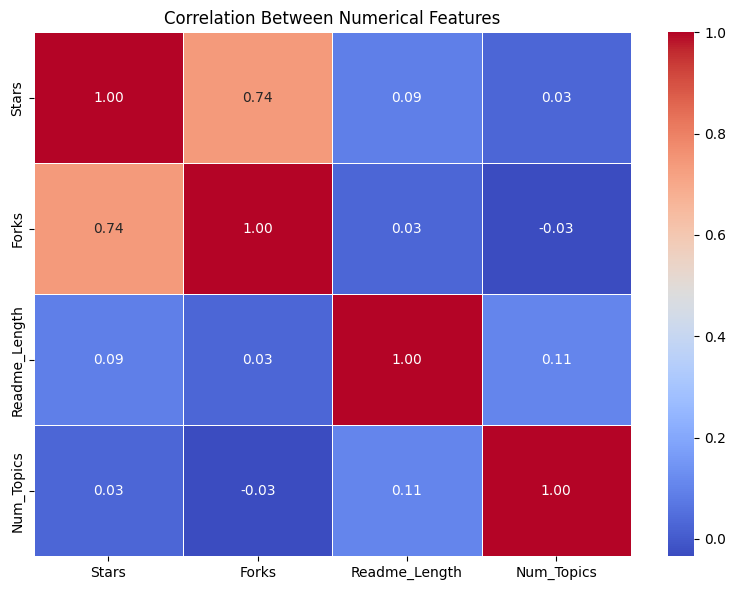

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df[['Stars', 'Forks', 'Readme_Length', 'Num_Topics']]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Between Numerical Features')
plt.tight_layout()
plt.show()


ANALYSIS IS
NEITHER README LENGTH AND NUMBER OF TOPICS IN A PROJECT MATTER INCASE OF POPULARITY. IT STRICTLY DEPENDS ON FORKS.
~
CONSIDERING STARS = POPULARITY
~

In [44]:
# Step 1: Drop rows with missing topic info
df_cleaned_topics = df.dropna(subset=['Topics']).copy()

# Step 2: Split the comma-separated string into a list
df_cleaned_topics['Topics_List'] = df_cleaned_topics['Topics'].apply(lambda x: [t.strip().lower() for t in x.split(',') if t.strip()])

# Step 3: Explode into one topic per row
df_exploded = df_cleaned_topics.explode('Topics_List').reset_index(drop=True)

df_exploded[['Name', 'Language', 'Topics_List']].head(100)


,Name,Language,Topics_List
0,django/django,Python,apps
1,django/django,Python,django
2,django/django,Python,framework
3,django/django,Python,models
4,django/django,Python,orm
...,...,...,...
95,netbox-community/netbox,Python,network
96,netbox-community/netbox,Python,network-automation
97,netbox-community/netbox,Python,python
98,netbox-community/netbox,Python,sot


In [45]:
df_exploded

,Topic,Name,Description,Stars,Forks,Language,Created At,Updated At,URL,Topics,README,README_Clean,Description_Clean,Readme_Length,Num_Topics,Topics_List
0,django,django/django,The Web framework for perfectionists with dead...,83894,32648,Python,2012-04-28 02:47:18+00:00,2025-06-13 14:30:00+00:00,https://github.com/django/django,"apps, django, framework, models, orm, python, ...",======\nDjango\n======\n\nDjango is a high-lev...,django django is a high-level python web fram...,the web framework for perfectionists with dead...,1741,9,apps
1,django,django/django,The Web framework for perfectionists with dead...,83894,32648,Python,2012-04-28 02:47:18+00:00,2025-06-13 14:30:00+00:00,https://github.com/django/django,"apps, django, framework, models, orm, python, ...",======\nDjango\n======\n\nDjango is a high-lev...,django django is a high-level python web fram...,the web framework for perfectionists with dead...,1741,9,django
2,django,django/django,The Web framework for perfectionists with dead...,83894,32648,Python,2012-04-28 02:47:18+00:00,2025-06-13 14:30:00+00:00,https://github.com/django/django,"apps, django, framework, models, orm, python, ...",======\nDjango\n======\n\nDjango is a high-lev...,django django is a high-level python web fram...,the web framework for perfectionists with dead...,1741,9,framework
3,django,django/django,The Web framework for perfectionists with dead...,83894,32648,Python,2012-04-28 02:47:18+00:00,2025-06-13 14:30:00+00:00,https://github.com/django/django,"apps, django, framework, models, orm, python, ...",======\nDjango\n======\n\nDjango is a high-lev...,django django is a high-level python web fram...,the web framework for perfectionists with dead...,1741,9,models
4,django,django/django,The Web framework for perfectionists with dead...,83894,32648,Python,2012-04-28 02:47:18+00:00,2025-06-13 14:30:00+00:00,https://github.com/django/django,"apps, django, framework, models, orm, python, ...",======\nDjango\n======\n\nDjango is a high-lev...,django django is a high-level python web fram...,the web framework for perfectionists with dead...,1741,9,orm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25079,artificial-intelligence,The-Pocket/PocketFlow,Pocket Flow: 100-line LLM framework. Let Agent...,5439,609,Python,2024-12-24 02:43:30+00:00,2025-06-13 15:03:21+00:00,https://github.com/The-Pocket/PocketFlow,"agentic-ai, agentic-framework, agentic-workflo...","<div align=""center"">\n <img src=""https://gith...",english httpsgithub.comthe-pocketpocketflowbl...,pocket flow 100-line llm framework. let agents...,11329,20,pocket-flow
25080,artificial-intelligence,The-Pocket/PocketFlow,Pocket Flow: 100-line LLM framework. Let Agent...,5439,609,Python,2024-12-24 02:43:30+00:00,2025-06-13 15:03:21+00:00,https://github.com/The-Pocket/PocketFlow,"agentic-ai, agentic-framework, agentic-workflo...","<div align=""center"">\n <img src=""https://gith...",english httpsgithub.comthe-pocketpocketflowbl...,pocket flow 100-line llm framework. let agents...,11329,20,pocketflow
25081,artificial-intelligence,The-Pocket/PocketFlow,Pocket Flow: 100-line LLM framework. Let Agent...,5439,609,Python,2024-12-24 02:43:30+00:00,2025-06-13 15:03:21+00:00,https://github.com/The-Pocket/PocketFlow,"agentic-ai, agentic-framework, agentic-workflo...","<div align=""center"">\n <img src=""https://gith...",english httpsgithub.comthe-pocketpocketflowbl...,pocket flow 100-line llm framework. let agents...,11329,20,retrieval-augmented-generation
25082,artificial-intelligence,The-Pocket/PocketFlow,Pocket Flow: 100-line LLM framework. Let Agent...,5439,609,Python,2024-12-24 02:43:30+00:00,2025-06-13 15:03:21+00:00,https://github.com/The-Pocket/PocketFlow,"agentic-ai, agentic-framework, agentic-workflo...","<div align=""center"">\n <img src=""https://gith...",english httpsgithub.comthe-pocketpocketflowbl...,pocket flow 100-line llm framework. let agents...,11329,20,workflow


In [46]:
counts = df_exploded.groupby(['Language', 'Topics_List']).size().reset_index(name='Count')

counts = counts.sort_values(by=['Language', 'Count'], ascending=[True, False])

top_topics = counts.groupby('Language').head(5)

top_topics.head(20)



,Language,Topics_List,Count
0,AsciiDoc,bitcoin,1
1,AsciiDoc,blockchain,1
2,AsciiDoc,blockchains,1
3,AsciiDoc,c-lightning,1
4,AsciiDoc,lightning-network,1
16,Assembly,c,2
17,Assembly,c-plus-plus,2
10,Assembly,arm,1
11,Assembly,assembly,1
12,Assembly,assembly-language,1


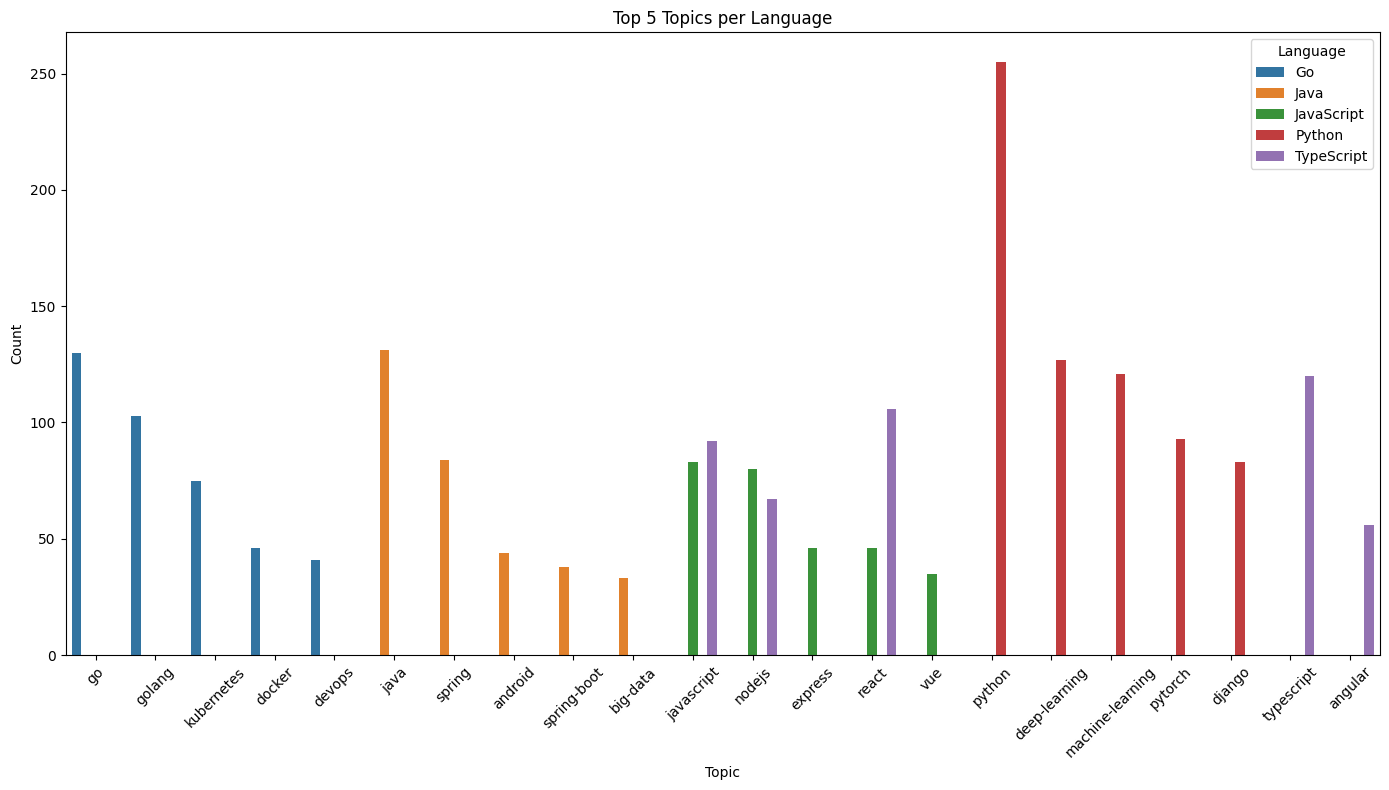

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick a few popular languages to plot
selected_languages = ['Python', 'JavaScript', 'TypeScript', 'Go', 'Java']

# Filter the top_topics dataframe
filtered = top_topics[top_topics['Language'].isin(selected_languages)]

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered, x='Topics_List', y='Count', hue='Language')
plt.title("Top 5 Topics per Language")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.legend(title='Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


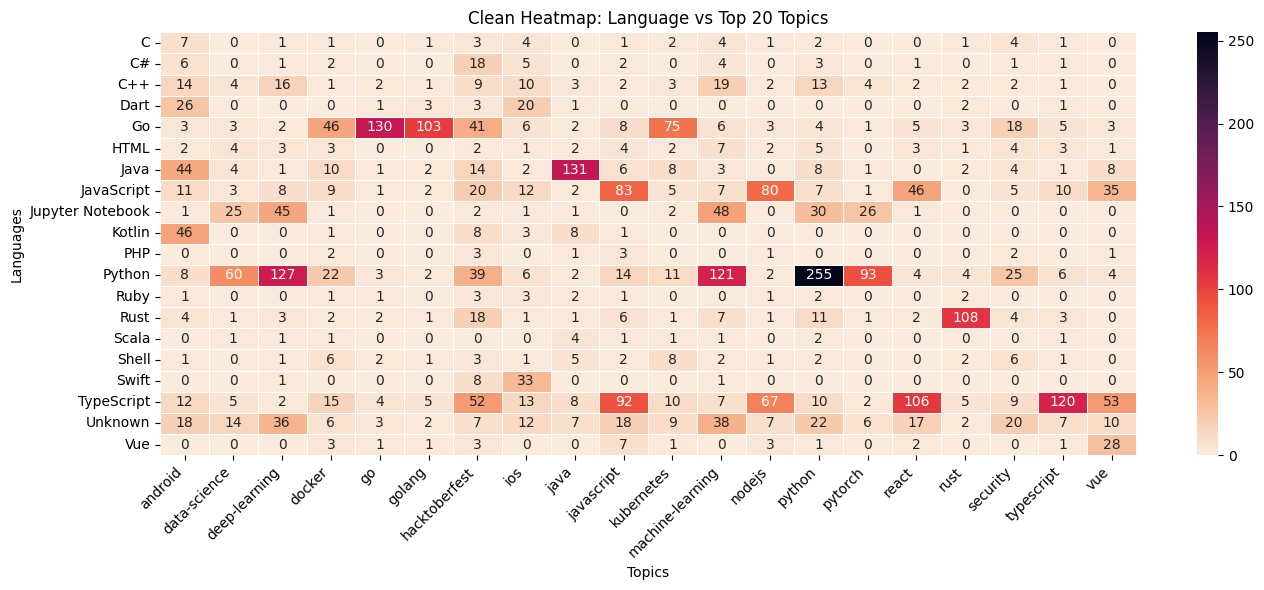

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter top 10 languages and top 20 most common topics
top_languages = df_exploded['Language'].value_counts().head(20).index
top_topics = df_exploded['Topics_List'].value_counts().head(20).index

# Step 2: Filter the dataframe
filtered_df = df_exploded[
    df_exploded['Language'].isin(top_languages) &
    df_exploded['Topics_List'].isin(top_topics)
]

# Step 3: Group and pivot for heatmap
heatmap_data = (
    filtered_df.groupby(['Language', 'Topics_List'])
    .size()
    .reset_index(name='Count')
    .pivot(index='Language', columns='Topics_List', values='Count')
    .fillna(0)
)

# Step 4: Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='rocket_r', linewidths=0.5, annot=True, fmt=".0f")
plt.title('Clean Heatmap: Language vs Top 20 Topics')
plt.xlabel('Topics')
plt.ylabel('Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Heat Map Insights Look Good.


In [49]:
df['Language'].unique()[:100]


array(['Python', 'JavaScript', 'TypeScript', 'HTML', 'Svelte', 'Rust',
       'Unknown', 'Go', 'Ruby', 'Jupyter Notebook', 'SCSS', 'CSS', 'C#',
       'Vue', 'C', 'Makefile', 'C++', 'Zig', 'MDX', 'Java', 'PHP',
       'Blade', 'Swift', 'Emacs Lisp', 'Dockerfile', 'Shell', 'EJS',
       'PowerShell', 'Visual Basic .NET', 'Julia', 'TeX', 'Mojo', 'Cuda',
       'Lua', 'QML', 'Dart', 'Markdown', 'Kotlin', 'Objective-C',
       'Groovy', 'Scala', 'Assembly', 'Elixir', 'Solidity', 'Pug',
       'Clojure', 'AsciiDoc', 'Haskell', 'Erlang', 'TypeSpec', 'Jinja',
       'Smarty'], dtype=object)

# **Smart Recommendation System (based on Language + Topics)**

first building a basic recommender using:

Matching Language + Topic
Low-to-medium stars (to avoid overerated ones)
README length or number of topics (optional quality signals)

In [61]:
# Normalize language column
df_exploded['Language'] = df_exploded['Language'].str.lower()

# Show all available languages
all_languages = sorted(df_exploded['Language'].dropna().unique())
print("\n Available programming languages to explore:\n")
print(", ".join([lang.title() for lang in all_languages]))

# Take user input
chosen_language = input("\nEnter a programming language from the list above: ").strip().lower()

# Filter dataset
language_df = df_exploded[df_exploded['Language'] == chosen_language].copy()

# Handle empty case
if language_df.empty:
    print(f"\n No projects found for '{chosen_language}'. Try a different one.")
else:
    # Lowercase the topic column
    language_df['Topics_List'] = language_df['Topics_List'].str.lower()

    # Count topics
    topic_counts = language_df['Topics_List'].value_counts()

    # Display top 5
    print(f"\n Top 5 most common topics in {chosen_language.title()}:\n")
    for topic, count in topic_counts.head(5).items():
        print(f"• {topic}: {count} repos")

    # Display 5 lesser-known topics
    print(f"\n 5 lesser-known topics in {chosen_language.title()}:\n")
    for topic, count in topic_counts[topic_counts > 0].tail(5).items():
        print(f"• {topic}: {count} repo")

    # Pick a rare topic that has *at least 2 projects*, or fallback
    rare_topic = None
    for topic in topic_counts.tail(10).index:  # Check last 10 to be safe
        if (language_df['Topics_List'] == topic).sum() >= 2:
            rare_topic = topic
            break
    if not rare_topic:
        rare_topic = topic_counts.tail(5).index[0]

    # Recommend repos
    recommended = language_df[language_df['Topics_List'] == rare_topic][['Name', 'URL']].drop_duplicates().head(5)

    print(f"\n Recommended GitHub projects in {chosen_language.title()} for the rare topic: '{rare_topic}':\n")
    for _, row in recommended.iterrows():
        print(f" {row['Name']} → {row['URL']}")



 Available programming languages to explore:

Asciidoc, Assembly, Blade, C, C#, C++, Clojure, Css, Cuda, Dart, Dockerfile, Ejs, Elixir, Emacs Lisp, Erlang, Go, Groovy, Haskell, Html, Java, Javascript, Jinja, Julia, Jupyter Notebook, Kotlin, Lua, Makefile, Markdown, Mdx, Mojo, Objective-C, Php, Powershell, Pug, Python, Qml, Ruby, Rust, Scala, Scss, Shell, Smarty, Solidity, Svelte, Swift, Tex, Typescript, Typespec, Unknown, Visual Basic .Net, Vue, Zig

Enter a programming language from the list above: cuda

 Top 5 most common topics in Cuda:

• 3d-reconstruction: 1 repos
• computer-graphics: 1 repos
• computer-vision: 1 repos
• cuda: 1 repos
• function-approximation: 1 repos

 5 lesser-known topics in Cuda:

• neural-network: 1 repo
• real-time: 1 repo
• real-time-rendering: 1 repo
• realtime: 1 repo
• signed-distance-functions: 1 repo

 Recommended GitHub projects in Cuda for the rare topic: 'neural-network':

 NVlabs/instant-ngp → https://github.com/NVlabs/instant-ngp


In [64]:
df['README_Clean'] = df['README_Clean'].fillna("")

In [67]:
# Step 1: Import TF-IDF tools
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Fill any missing README_Clean values with blank
df['README_Clean'] = df['README_Clean'].fillna("")

# Step 3: Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    stop_words='english',     # remove common English words like 'the', 'is'
    max_df=0.9,               # ignore terms that appear in >90% of documents
    min_df=2,                 # ignore very rare terms that appear in <2 docs
    max_features=5000         # (optional) limit to top 5000 features
)

# Step 4: Fit and transform README_Clean column into TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df['README_Clean'])

# Step 5 (Optional): Store feature names (words)
tfidf_feature_names = vectorizer.get_feature_names_out()

# Output shape
print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (2419, 5000)


In [68]:
print(tfidf_matrix[0])


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 77 stored elements and shape (1, 5000)>
  Coords	Values
  (0, 1430)	0.6770504125412617
  (0, 2131)	0.047295678943705746
  (0, 2610)	0.04826720449914768
  (0, 3597)	0.04050384064255978
  (0, 4850)	0.03895302873737891
  (0, 1890)	0.043324360691525295
  (0, 3642)	0.084329465100121
  (0, 1360)	0.10815529896273342
  (0, 824)	0.06129717620859583
  (0, 1334)	0.04944793615171428
  (0, 4480)	0.05016896188739831
  (0, 782)	0.07264591701208489
  (0, 1441)	0.03415696399140962
  (0, 1437)	0.23474079013968363
  (0, 1399)	0.046505725826213914
  (0, 3112)	0.11038040047825626
  (0, 2179)	0.21112390859840718
  (0, 4977)	0.050665391430869365
  (0, 2507)	0.04132971912875832
  (0, 1970)	0.08338258728603358
  (0, 4256)	0.03664135481609248
  (0, 2117)	0.070978668587357
  (0, 3682)	0.05843563356040501
  (0, 3655)	0.15254496160872047
  (0, 4629)	0.2814321323311115
  :	:
  (0, 2108)	0.03505308461522934
  (0, 2483)	0.09195007077395166
  (0, 1404)	0.05

In [73]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Ask user for a search idea
user_idea = input(" Enter a topic idea to search (e.g., 'ai chatbot', 'ecommerce app'): ").strip().lower()

# Step 2: Transform the user input into TF-IDF vector using the same vectorizer
idea_vector = vectorizer.transform([user_idea])

# Step 3: Compute cosine similarity with all README vectors
similarities = cosine_similarity(idea_vector, tfidf_matrix).flatten()

# Step 4: Get top 5 similar projects (highest scores)
top_indices = similarities.argsort()[-5:][::-1]

# Step 5: Show results
print("\n Top 5 GitHub projects matching your idea:\n")
for idx in top_indices:
    print(f" {df.iloc[idx]['Name']} → {df.iloc[idx]['URL']}")


KeyboardInterrupt: Interrupted by user

In [ ]:
\